# pands_project: Iris Data set analysis

### Author: Lais Coletta

#### Iris data set
 


I started this analysis by downloading the file Iris_csv.csv from the github repository https://github.com/joeyajames/Python/blob/master/Iris%20Dataset/iris.data. This data contains the sepallength, sepalwidth, petallength and petalwidth of 3 species of flowers. I will first create the variable 'df' for the data frame 'Iris_csv'. Then I will read the csv file using the read () function:

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import function that stops showing the warning boxes in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('iris_csv.csv')
print (df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


## Statistical Insights

To gather a statistical overview I will use the describe() function. This function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution. The definition of each parameter we have when calling this function are:

count - The number of not-empty values;
mean - The average (mean) value;
std - The standard deviation;
min - the minimum value;
25% - The 25% percentile*;
50% - The 50% percentile*;
75% - The 75% percentile*;
max - the maximum value.

*Percentile meaning: how many of the values are less than the given percentile.

<i> reference: w3resource.com/pandas/dataframe/dataframe-describe.php) </i>

In [35]:
df.describe ()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Data organised by species of flowers. We have exactly 50 of each species, Iris Setosa, Iris Versicolor and Iris Viginica.

In [36]:
df.species.value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Data Visualization

## Species count

<AxesSubplot:title={'center':'Species Count'}, xlabel='species', ylabel='count'>

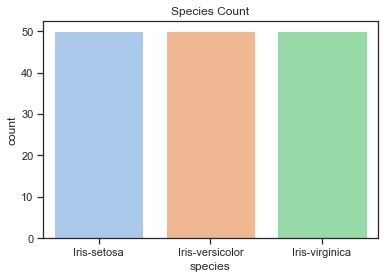

In [37]:
plt.title ('Species Count')
sns.countplot(df['species'])

In this histogram, using the countplot() function, we are able to visualize that the species are well balanced, each species has 50 as it's data count. 

## Data visualization of each attribute using histograms

Text(0, 0.5, 'Count')

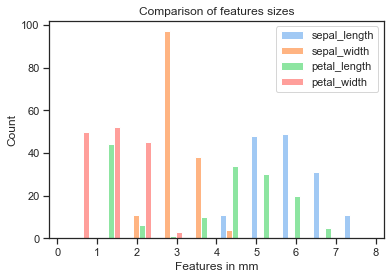

In [38]:
plt.hist([df['sepal_length'], df['sepal_width'], df['petal_length'], df['petal_width']])
labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.legend(labels)
plt.title('Comparison of features sizes')
plt.xlabel("Features in mm")
plt.ylabel("Count")


In this histogram, we can compare the sizes of each attribute, the length and the width of the sepals and petals, in millimeter. Sepal width is by far the attribute with the highest amount of features with aprox. 3 mm and lies in the middle of the graph with an average size between aprox. 2 and 4.4. Sepal length presents the highest amount of features with larger sizes and petal width with the smaller sizes. Petal lenght is the attribute that highest range, from aprox. 1.3 to 6.9.

<b> Subplots for each attribute </b>

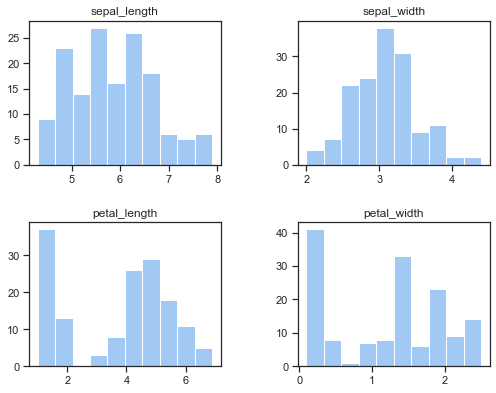

In [39]:
#plt.subplots() is a function that returns a tuple containing a figure and axes objects, 'unpacking' this tuple into the variables fig and ax. (source: https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python )
# (2,2) - returns 4 graphs, 2 each row
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax[0, 0].hist(df['sepal_length'])
ax[0, 0].set_title('sepal_length')

ax[0, 1].hist(df['sepal_width'])
ax[0, 1].set_title('sepal_width')

ax[1, 0].hist(df['petal_length'])
ax[1, 0].set_title('petal_length')

ax[1, 1].hist(df['petal_width'])
ax[1, 1].set_title('petal_width')

# setting the spacing between subplots (reference: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

By creating four subplots, it is easier to analyse how the data is distributed between the different attributes. However, the scale changes between plots, which makes it more complicated to compare, but still useful when observing patterns. Sepal Width, for example, has higher values in the middle of the graph, with its highest amount of data located in between 3.0 and 3.3. In petal lenght and width graphs, in the other hand, there is a gap between the sizes. Sepal lenght presents the biggest size (almost 8mm) and the amount distribution oscillates less than the other features (9 to 28 aprox.). 

In the next subplots we have a more detailed representation of attributes presenting species by color. The KDE curve is very usefull to understand patters based on x's values. According to the seaborn website, <i> KDE or kernel density estimate plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
(source: https://seaborn.pydata.org/generated/seaborn.kdeplot.html)</i>

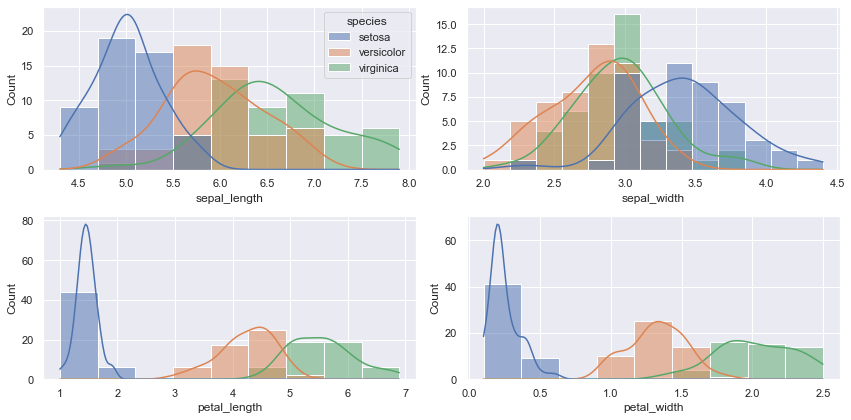

In [51]:
# creating a more detailed version of the previous histogram subplots. Highlighting the species inside each attribute by color and using KDE curve to understand patterns and tendencies
# reference: https://stackoverflow.com/questions/67300148/best-fit-to-a-histogramplot-iris
# spicy.stats is a sub-package used for probability and statistical operations
from scipy.stats import norm
# create variable that loads iris data set from the online repository (requires internet)
iris = sns.load_dataset('iris')
# make the 'species' column categorical to fix the order. A categorical variable (sometimes called a nominal variable) is one that has two or more categories. source: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Categorical.html
iris['species'] = pd.Categorical(iris['species'])
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

for col, ax in zip(iris.columns[:4], axs.flat):
    sns.histplot(data=iris, x=col, kde=True, hue='species', common_norm=False, legend=ax==axs[0,0], ax=ax)
plt.tight_layout()

Using this type of graph, 

## Comparison between species

<b> Comparison based on sepal lenght and width using scatter plot </b>

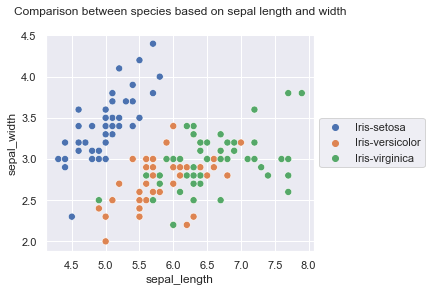

In [41]:
plt.title('Comparison between species based on sepal length and width', y=1.06)
sns.scatterplot(df['sepal_length'],df['sepal_width'],hue =df['species'],s=50)
ax = plt.subplot(111)

# Shrinking plot width by 20% to fit legend box outside the axis of the figure (source: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot-in-matplotlib)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In this scatter plot, we can visualize that the Iris Setosa species has a smaller sepal lenght but higher width. Iris Versicolor has an average size of sepal lenght and the smallest sepal width, between 2.0 and aprox. 3.4, and Iris Virginica has a larger sepal length overall.

<b> Comparison between species based on petal length and width <b>

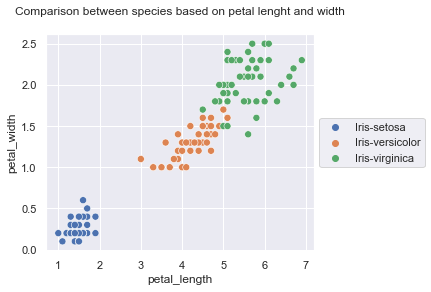

In [42]:
plt.title('Comparison between species based on petal lenght and width', y=1.06)
sns.scatterplot(df['petal_length'], df['petal_width'], hue = df['species'], s= 50)
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

When comparing the petal attributes between species in this scatter plot, we can easily see that Iris Setosa have the smallest petal length and width followed by Irish Versicolor and Iris Virginica. This graph also shows that the petal size can be an attribute used to diferentiate those species as they tend to follow a pattern of small, medium and large petals. 

<b> Box plot </b>

Another way to compare the Box plots show the distribution of data over an attribute by preseting the 25th, 50th (median) and 75th percentiles:

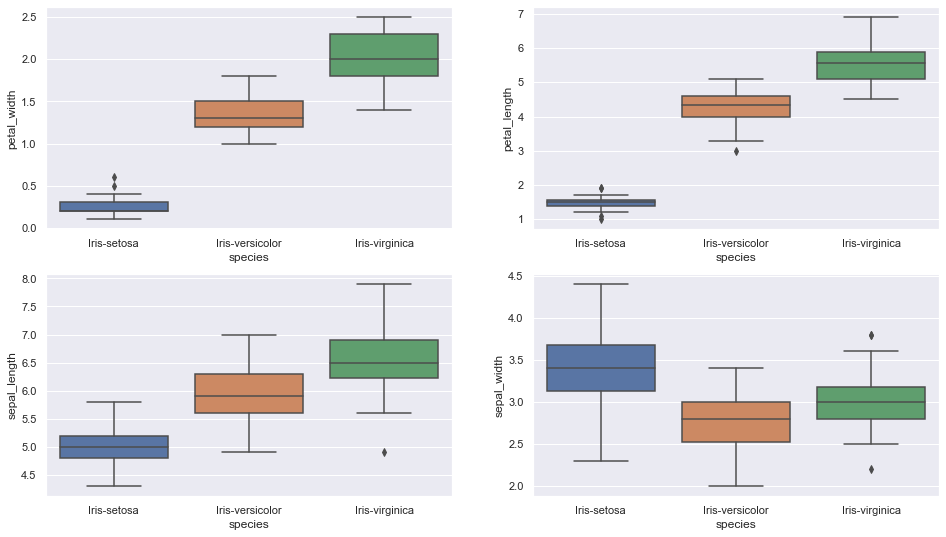

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y='petal_width', x= 'species', data=df, orient='v' , ax=axes[0, 0])
sns.boxplot( y='petal_length', x= 'species', data=df, orient='v' , ax=axes[0, 1])
sns.boxplot( y='sepal_length', x= 'species', data=df, orient='v' , ax=axes[1, 0])
sns.boxplot( y='sepal_width', x= 'species', data=df, orient='v' , ax=axes[1, 1])
plt.show()